In [1]:
#Project One APIs
!pip install quandl
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import json
import quandl
from pprint import pprint


In [2]:
#Wells Fargo interest rates over time
#Had to modify URL with start & end dates
#30 yr fixed
WellsFargo_URL = "https://www.quandl.com/api/v3/datasets/WFC/PR_CON_30YFIXED_IR.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response = requests.get(WellsFargo_URL).json()


In [3]:
#Freddie Mac interest rates over time
#Had to modify URL with start & end dates
#30 yr fixed
FreddieMac_URL = "https://www.quandl.com/api/v3/datasets/FMAC/30US.json?kVegd86TY3SQ2hMHSkRJ=kVegd86TY3SQ2hMHSkRJ&start_date=2016-04-26&end_date=2020-08-31"
response_freddie = requests.get(FreddieMac_URL).json()
pprint(response_freddie)




{'dataset': {'collapse': None,
             'column_index': None,
             'column_names': ['Date', 'Value'],
             'data': [['2020-08-27', 2.91],
                      ['2020-08-20', 2.99],
                      ['2020-08-13', 2.96],
                      ['2020-08-06', 2.88],
                      ['2020-07-30', 2.99],
                      ['2020-07-23', 3.01],
                      ['2020-07-16', 2.98],
                      ['2020-07-09', 3.03],
                      ['2020-07-02', 3.07],
                      ['2020-06-25', 3.13],
                      ['2020-06-18', 3.13],
                      ['2020-06-11', 3.21],
                      ['2020-06-04', 3.18],
                      ['2020-05-28', 3.15],
                      ['2020-05-21', 3.24],
                      ['2020-05-14', 3.28],
                      ['2020-05-07', 3.26],
                      ['2020-04-30', 3.23],
                      ['2020-04-23', 3.33],
                      ['2020-04-16', 3.31],
      

In [4]:
#stepping into the data values
#pprint(response["dataset"]["data"])
#pprint(response_freddie["dataset"]["data"])

In [5]:
#creating data frame
values = pd.DataFrame(response["dataset"]["data"])
values = values.rename(columns={0:"Date",1:"Wells Fargo Rate"})
values_freddie=pd.DataFrame(response_freddie["dataset"]["data"])
values_freddie = values_freddie.rename(columns={0:"Date",1:"Freddie Mac Rate"})

# They didn't both have rates available for every date, so I dropped all the NaN values
values_combined = pd.merge(values,values_freddie,how="outer",on="Date")
values_combined.dropna(how='any', inplace=True)
#Needed to sort the dates from oldest to newest
values_combined_sorted=values_combined.sort_values(by=['Date'], ascending=True)
values_combined_sorted

,Date,Wells Fargo Rate,Freddie Mac Rate
1558,2016-04-28,3.875,3.66
1551,2016-05-05,3.750,3.61
1544,2016-05-12,3.750,3.57
1537,2016-05-19,3.875,3.58
1530,2016-05-26,3.875,3.64
...,...,...,...
32,2020-07-30,3.000,2.99
25,2020-08-06,3.000,2.88
18,2020-08-13,3.000,2.96
11,2020-08-20,2.875,2.99


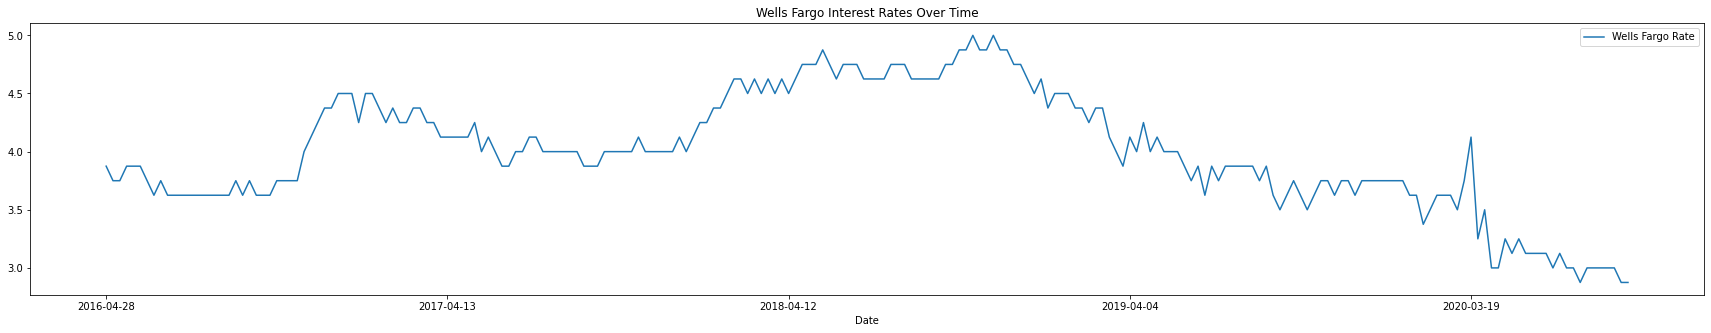

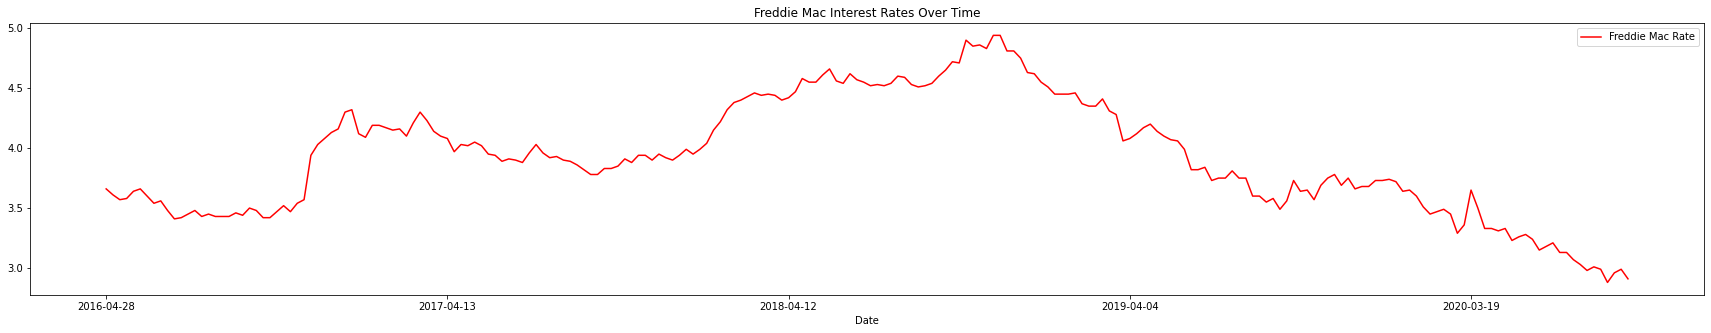

In [6]:
#values.plot(kind='line',x='Date',y='Wells Fargo Rate',figsize=(30,5))
values_combined_sorted.plot(kind='line',x='Date',y='Wells Fargo Rate',figsize=(30,5))
plt.title("Wells Fargo Interest Rates Over Time")
values_combined_sorted.plot(kind='line',x='Date',y='Freddie Mac Rate',figsize=(30,5), color="red")
plt.title("Freddie Mac Interest Rates Over Time")
plt.show()
#would like to make this into a interactive line graph


In [7]:
#WellsFargo_df.to_csv("WellsFargo_InterestRates", encoding="utf-8", index=False)
#values.to_csv("WellsFargo_InterestRates_table", encoding="utf-8", index=False)
values_combined_sorted.to_csv("WellsFargo_FreddieMac_Interest_Rates", encoding="utf-8",index=False)